In [3]:
#1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

import plotly.graph_objects as go
import plotly.express as px

from plotly.subplots import make_subplots

In [4]:
#2. LOADING DATA AND CHECK LOADING RESULT
df = pd.read_csv(r'C:\Users\QuanHo\Desktop\Data Skills\MCI DE\Python\Assignment\IBM_HR_Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
# 3. REVIEW DATA
# 3.1. REVIEW SCHEMA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [136]:
# 3. REVIEW DATA
# 3.2. CHECK NULL
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [227]:
# 4.DESCRIPTIVE ANALYSIS

# 4.1. ATTRITION RATE BY DEPARTMENT: 

count_by_department = pd.DataFrame(df.groupby(['Department','Attrition']).agg({'EmployeeCount':'sum'}))
count_by_department.reset_index(inplace = True)
attrition_by_department = count_by_department.pivot(index= 'Department',columns='Attrition',values='EmployeeCount')
attrition_by_department.reset_index(inplace = True)
attrition_by_department['attrition rate%'] = round((attrition_by_department['Yes'] / attrition_by_department['No'])*100,2)
attrition_by_department_sort = attrition_by_department.sort_values('attrition rate%', ascending= False)

attrition_by_department_sort


Attrition,Department,No,Yes,attrition rate%
2,Sales,354,92,25.99
0,Human Resources,51,12,23.53
1,Research & Development,828,133,16.06


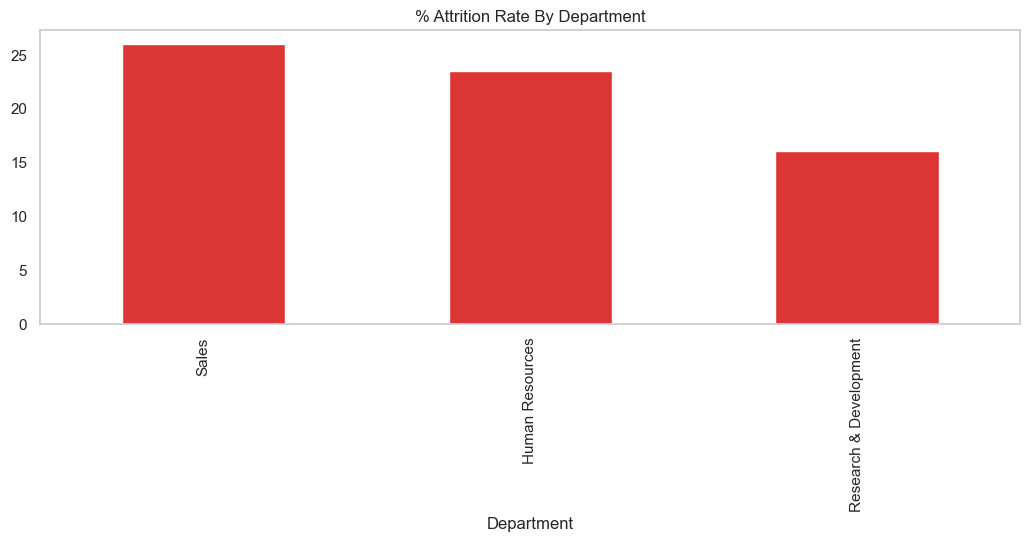

In [239]:
attrition_by_department_sort.plot(
    x = 'Department',y = 'attrition rate%', kind = 'bar',figsize =(10,3),use_index = True, title = '% Attrition Rate By Department',
    color = '#DC3535',
    grid = False, legend = False
    )
plt.show()

<AxesSubplot: title={'center': '% Attrition Rate By Business Travel'}, ylabel='BusinessTravel'>

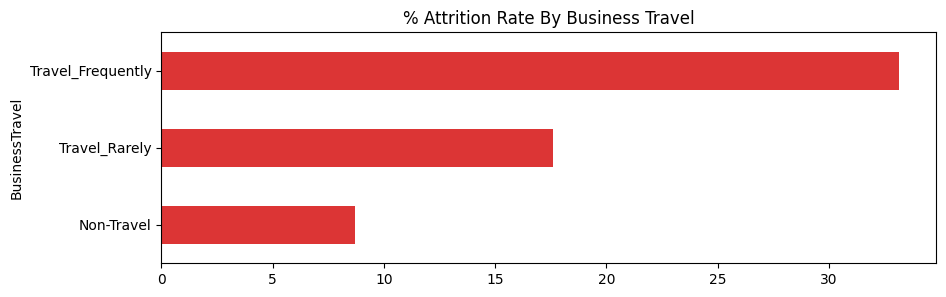

In [41]:
# 4.DESCRIPTIVE ANALYSIS

# 4.3. ATTRITION RATE BY BUSINESS TRAVEL: 

count_by_travel = pd.DataFrame(df.groupby(['BusinessTravel','Attrition']).agg({'EmployeeCount':'sum'}))
count_by_travel.reset_index(inplace = True)
attrition_by_travel = count_by_travel.pivot(index= 'BusinessTravel',columns='Attrition',values='EmployeeCount')
attrition_by_travel.reset_index(inplace = True)
attrition_by_travel['attrition rate%'] = round((attrition_by_travel['Yes'] / attrition_by_travel['No'])*100,2)
attrition_by_travel_sort = attrition_by_travel.sort_values('attrition rate%', ascending= True)

attrition_by_travel_sort.plot(
    x = 'BusinessTravel',y = 'attrition rate%', kind = 'barh',figsize =(10,3),use_index = True, title = '% Attrition Rate By Business Travel',
    color = '#DC3535',
    grid = False, legend = False
    )

<AxesSubplot: title={'center': '% Attrition Rate By Job Role'}, ylabel='JobRole'>

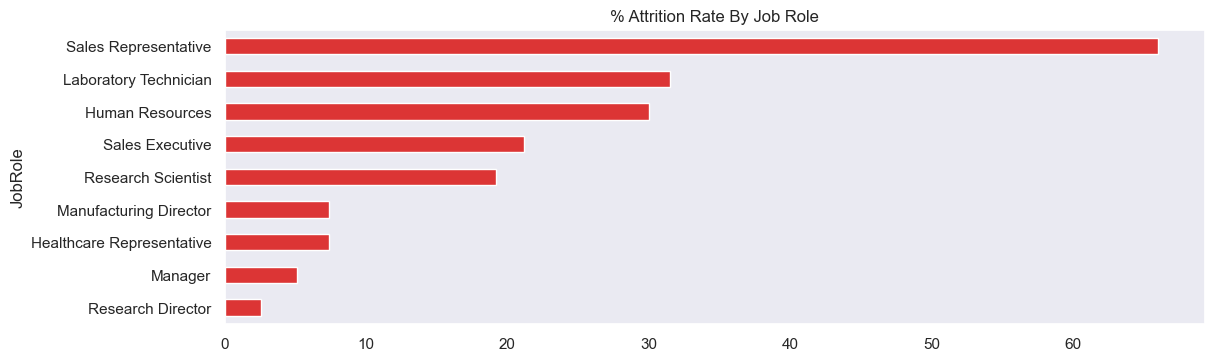

In [348]:
# 4.DESCRIPTIVE ANALYSIS

# 4.4. ATTRITION RATE BY JOB ROLE: 

count_by_role = pd.DataFrame(df.groupby(['JobRole','Attrition']).agg({'EmployeeCount':'sum'}))
count_by_role.reset_index(inplace = True)
attrition_by_role = count_by_role.pivot(index= 'JobRole',columns='Attrition',values='EmployeeCount')
attrition_by_role.reset_index(inplace = True)
attrition_by_role['attrition rate%'] = round((attrition_by_role['Yes'] / attrition_by_role['No'])*100,2)
attrition_by_role_sort = attrition_by_role.sort_values('attrition rate%', ascending= True)

attrition_by_role_sort.plot(
    x = 'JobRole',y = 'attrition rate%', kind = 'barh',figsize =(10,3),use_index = True, title = '% Attrition Rate By Job Role',
    color = '#DC3535',
    grid = False, legend = False
    )


<AxesSubplot: title={'center': '% Attrition Rate By Job Involvement'}, xlabel='JobInvolvement'>

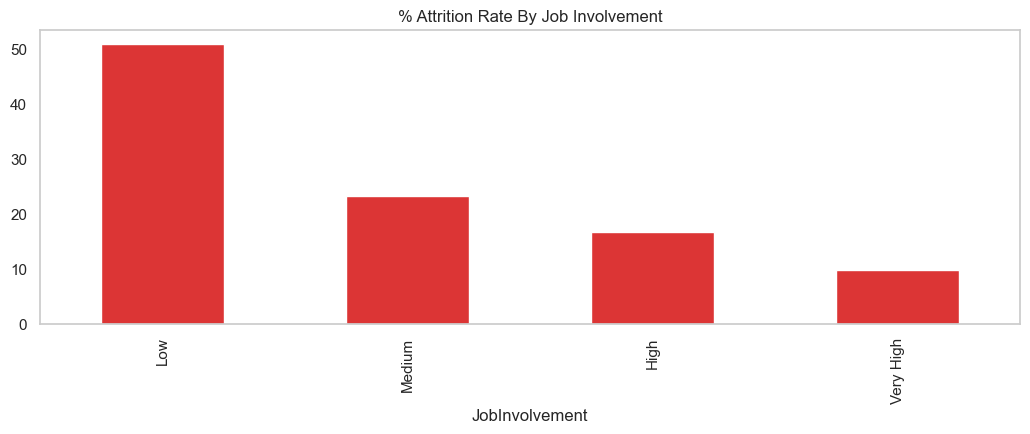

In [243]:
# 4.DESCRIPTIVE ANALYSIS

# 4.5. ATTRITION RATE BY JOB INVOLVEMENT: 

df['JobInvolvement']=df['JobInvolvement'].replace(1,'Low')
df['JobInvolvement']=df['JobInvolvement'].replace(2,'Medium')
df['JobInvolvement']=df['JobInvolvement'].replace(3,'High')
df['JobInvolvement']=df['JobInvolvement'].replace(4,'Very High')

count_by_involvement = pd.DataFrame(df.groupby(['JobInvolvement','Attrition']).agg({'EmployeeCount':'sum'}))
count_by_involvement.reset_index(inplace = True)
attrition_by_involvement = count_by_involvement.pivot(index= 'JobInvolvement',columns='Attrition',values='EmployeeCount')
attrition_by_involvement.reset_index(inplace = True)
attrition_by_involvement['attrition rate%'] = round((attrition_by_involvement['Yes'] / attrition_by_involvement['No'])*100,2)
attrition_by_involvement_sort = attrition_by_involvement.sort_values('attrition rate%', ascending= False)

attrition_by_involvement_sort.plot(
    x = 'JobInvolvement',y = 'attrition rate%', kind = 'bar',figsize =(10,3),use_index = True, title = '% Attrition Rate By Job Involvement',
    color = '#DC3535',
    grid = False, legend = False
    )

c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

Text(0.5, 1.0, 'Monthly Income Distribution By Each Role')

c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

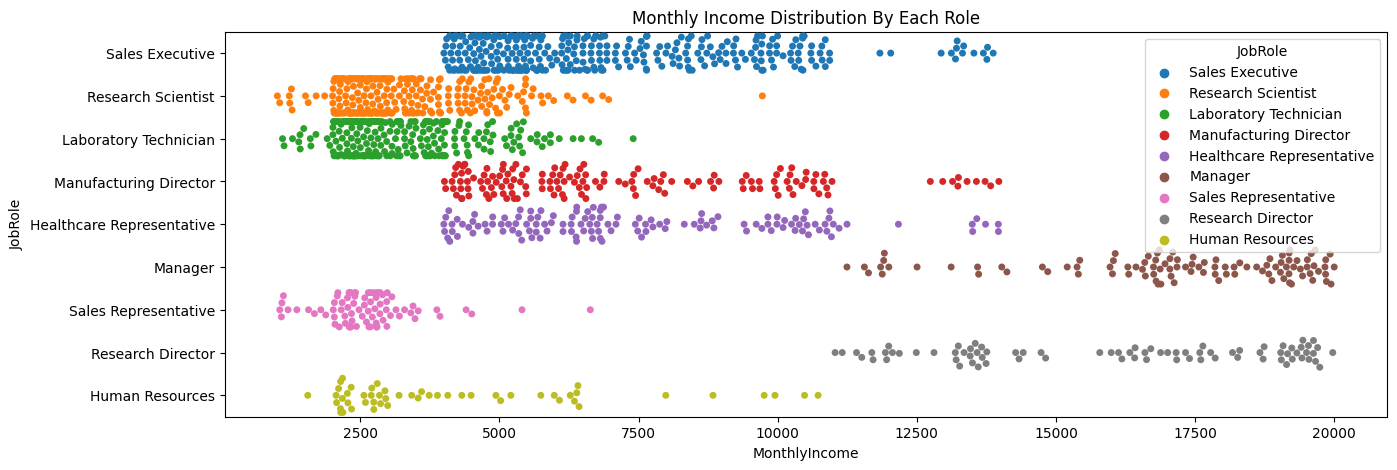

In [38]:
# 4.DESCRIPTIVE ANALYSIS

# 4.6. MONTHLY INCOME DISTRIBUTION BY JOB ROLE

fig, axes = plt.subplots(figsize=(15,5))

ax=sns.swarmplot(axes, x=df["MonthlyIncome"], y=df["JobRole"], hue=df["JobRole"])
axes.set_title("Monthly Income Distribution By Each Role")

<AxesSubplot: title={'center': 'HourlyRate'}, xlabel='JobLevel'>

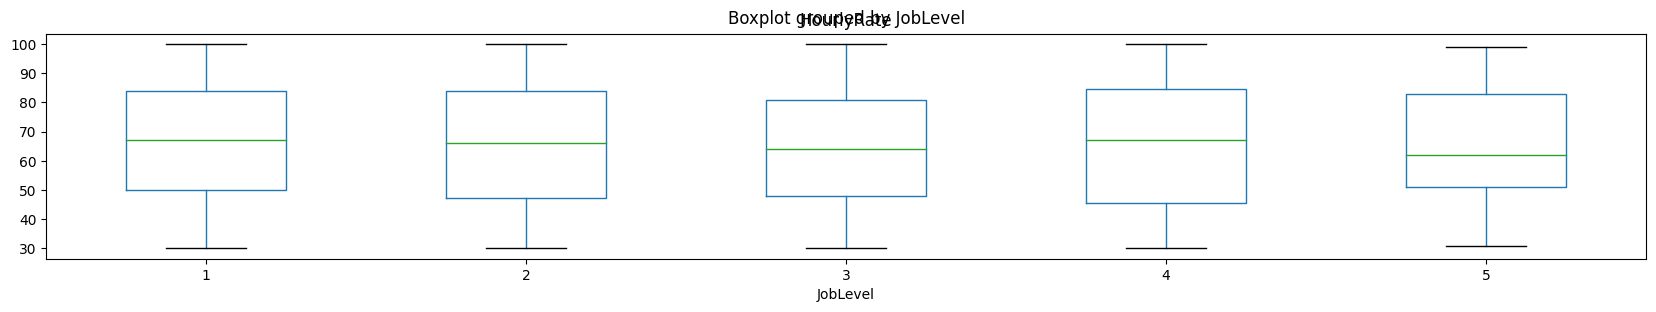

In [39]:
# 4.DESCRIPTIVE ANALYSIS

# 4.7. HOURLY RATE BY JOB LEVEL

df.boxplot(by ='JobLevel', column =['HourlyRate'], grid = False, figsize = (20,3))

<AxesSubplot: title={'center': '% Attrition Rate By Job Satisfaction'}, xlabel='JobSatisfaction'>

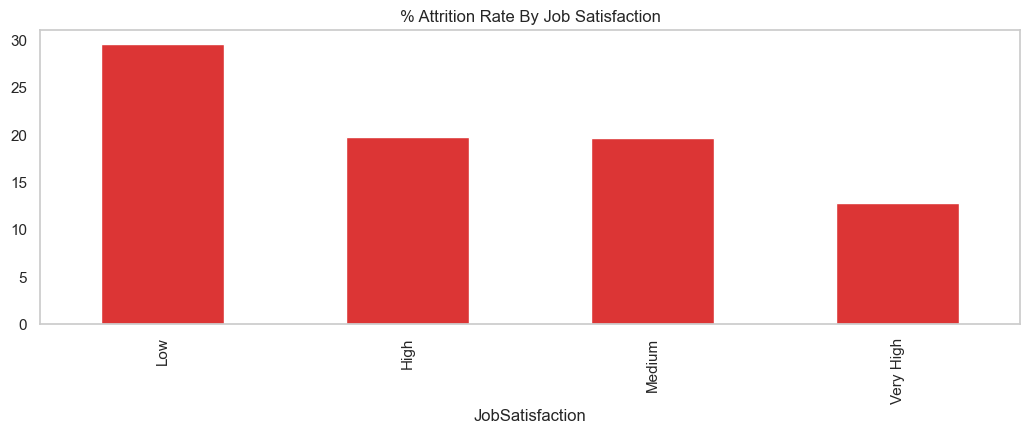

In [245]:
# 4.DESCRIPTIVE ANALYSIS

# 4.8. ATTRITION RATE BY JOB SATISFACTION: 

df['JobSatisfaction']=df['JobSatisfaction'].replace(1,'Low')
df['JobSatisfaction']=df['JobSatisfaction'].replace(2,'Medium')
df['JobSatisfaction']=df['JobSatisfaction'].replace(3,'High')
df['JobSatisfaction']=df['JobSatisfaction'].replace(4,'Very High')

count_by_job_satisfaction = pd.DataFrame(df.groupby(['JobSatisfaction','Attrition']).agg({'EmployeeCount':'sum'}))
count_by_job_satisfaction.reset_index(inplace = True)
attrition_by_job_satisfaction = count_by_job_satisfaction.pivot(index= 'JobSatisfaction',columns='Attrition',values='EmployeeCount')
attrition_by_job_satisfaction.reset_index(inplace = True)
attrition_by_job_satisfaction['attrition rate%'] = round((attrition_by_job_satisfaction['Yes'] / attrition_by_job_satisfaction['No'])*100,2)
attrition_by_job_satisfaction_sort = attrition_by_job_satisfaction.sort_values('attrition rate%', ascending= False)

attrition_by_job_satisfaction_sort.plot(
    x = 'JobSatisfaction',y = 'attrition rate%', kind = 'bar',figsize =(10,3),use_index = True, title = '% Attrition Rate By Job Satisfaction',
    color = '#DC3535',
    grid = False, legend = False
    )

<AxesSubplot: title={'center': '% Attrition Rate By Relationship Satisfaction'}, xlabel='RelationshipSatisfaction'>

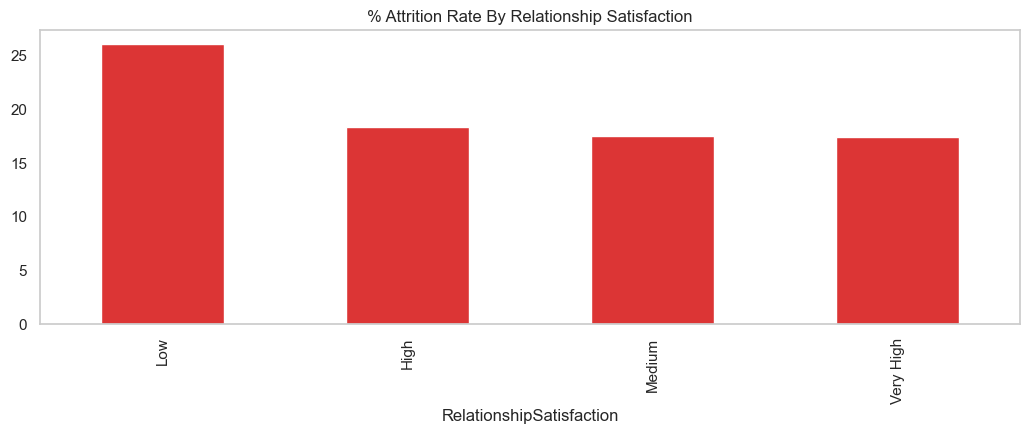

In [247]:
# 4.DESCRIPTIVE ANALYSIS

# 4.9. ATTRITION RATE BY RELATIONSHIP SATISFACTION: 

df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(1,'Low')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(2,'Medium')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(3,'High')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(4,'Very High')

count_by_relationship_satisfaction = pd.DataFrame(df.groupby(['RelationshipSatisfaction','Attrition']).agg({'EmployeeCount':'sum'}))
count_by_relationship_satisfaction.reset_index(inplace = True)
attrition_by_relationship_satisfaction = count_by_relationship_satisfaction.pivot(index= 'RelationshipSatisfaction',columns='Attrition',values='EmployeeCount')
attrition_by_relationship_satisfaction.reset_index(inplace = True)
attrition_by_relationship_satisfaction['attrition rate%'] = round((attrition_by_relationship_satisfaction['Yes'] / attrition_by_relationship_satisfaction['No'])*100,2)
attrition_by_relationship_satisfaction_sort = attrition_by_relationship_satisfaction.sort_values('attrition rate%', ascending= False)

attrition_by_relationship_satisfaction_sort.plot(
    x = 'RelationshipSatisfaction',y = 'attrition rate%', kind = 'bar',figsize =(10,3),use_index = True, title = '% Attrition Rate By Relationship Satisfaction',
    color = '#DC3535',
    grid = False, legend = False
    )

In [267]:
# 4.DESCRIPTIVE ANALYSIS

# 4.10. CONTRIBUTION OF EMPLOYEES WHO HAVE LOW SATISFACTION, IN TERM OF JOB, ENVIRONMENT AND RELATIONSHIP:

df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(1,'Low')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(2,'Medium')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(3,'High')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(4,'Very High')

Low_Satisfaction = df[(df['JobSatisfaction']=='Low')&(df['RelationshipSatisfaction']=='Low')&(df['EnvironmentSatisfaction']=='Low')]
Low_Satisfaction['EmployeeCount'].sum()

Low_Satisfaction_Percent = round((Low_Satisfaction['EmployeeCount'].sum())/(df['EmployeeCount'].sum())*100,2)

print(Low_Satisfaction_Percent)

1.09


<AxesSubplot: title={'center': '% Attrition Rate By Worklife Balance'}, xlabel='WorkLifeBalance'>

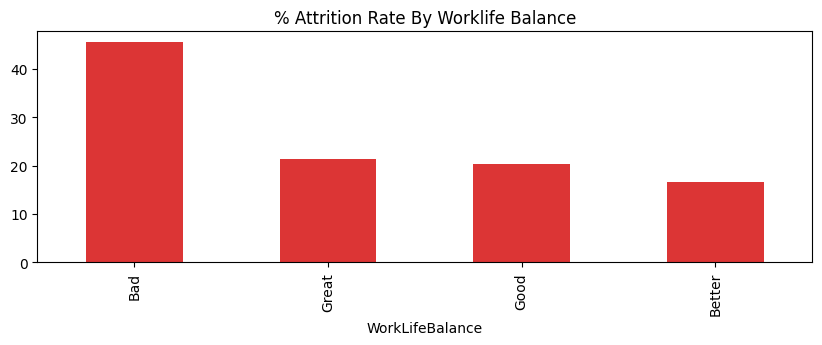

In [16]:
# 4.DESCRIPTIVE ANALYSIS

# 4.11. ATTRITION RATE BY WORKLIFE BALANCE: 

df['WorkLifeBalance']=df['WorkLifeBalance'].replace(1,'Bad')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(2,'Good')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(3,'Better')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(4,'Great')

count_by_balance = pd.DataFrame(df.groupby(['WorkLifeBalance','Attrition']).agg({'EmployeeCount':'sum'}))
count_by_balance.reset_index(inplace = True)
attrition_by_balance = count_by_balance.pivot(index= 'WorkLifeBalance',columns='Attrition',values='EmployeeCount')
attrition_by_balance.reset_index(inplace = True)
attrition_by_balance['attrition rate%'] = round((attrition_by_balance['Yes'] / attrition_by_balance['No'])*100,2)
attrition_by_balance_sort = attrition_by_balance.sort_values('attrition rate%', ascending= False)

attrition_by_balance_sort.plot(
    x = 'WorkLifeBalance',y = 'attrition rate%', kind = 'bar',figsize =(10,3),use_index = True, title = '% Attrition Rate By Worklife Balance',
    color = '#DC3535',
    grid = False, legend = False
    )

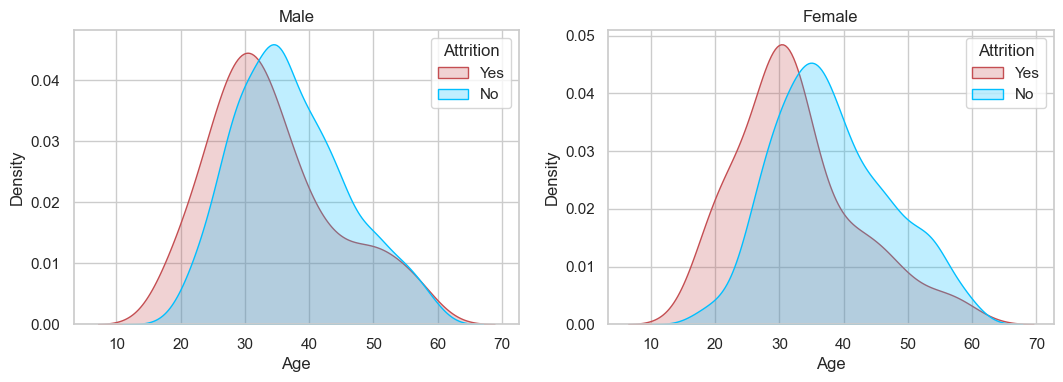

In [331]:
# 4.DESCRIPTIVE ANALYSIS

# 4.12. ATTRITION BY GENDER AND AGE DISTRIBUTION 


fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,3))

sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['Age'], color='r', fill=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['Age'], color='#00BFFF', fill=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')

sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['Age'], color='r', fill=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['Age'], color='#00BFFF', fill=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')

plt.show()

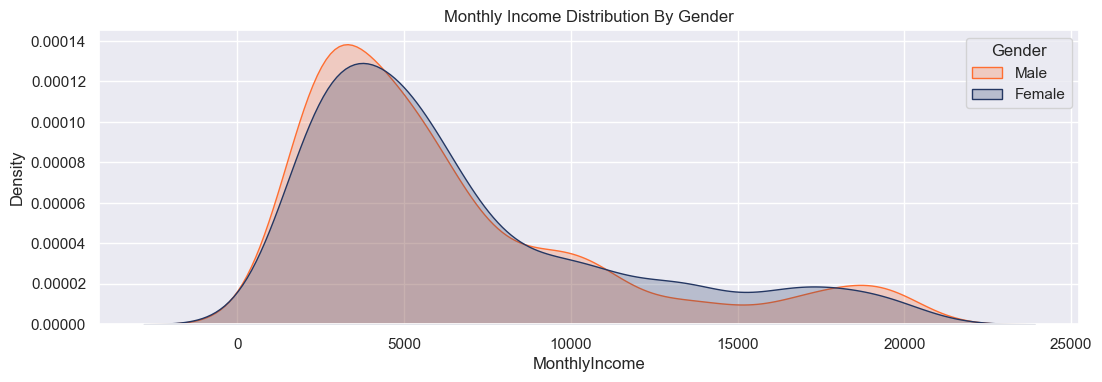

In [346]:
# 4.DESCRIPTIVE ANALYSIS

# 4.13. ATTRITION BY GENDER AND MONTHLY INCOME DISTRIBUTION 

fig, axes = plt.subplots(figsize=(10,3))

sns.kdeplot(axes,x=df[(df['Gender']=='Male')]['MonthlyIncome'], color='#FF6E31', fill = True, label='Male')
sns.kdeplot(axes,x=df[(df['Gender']=='Female')]['MonthlyIncome'], color='#243763', fill = True,label='Female')

axes.set_title('Monthly Income Distribution By Gender')
axes.legend(title='Gender')


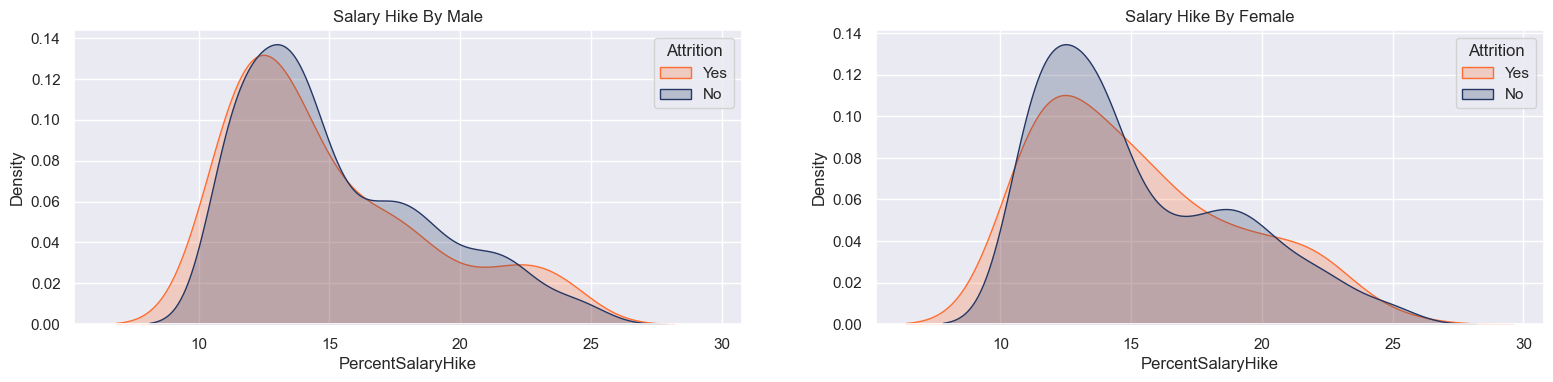

In [353]:
# 4.DESCRIPTIVE ANALYSIS

# 4.14. ATTRITION BY GENDER AND SALARY HIKE 

fig, axes=plt.subplots(1, 2, sharex=True, figsize=(15,3))

sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['PercentSalaryHike'], color='#FF6E31', fill = True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['PercentSalaryHike'], color='#243763', fill = True,label='No')

axes[0].set_title('Salary Hike By Male')
axes[0].legend(title='Attrition')

sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['PercentSalaryHike'], color='#FF6E31', fill = True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['PercentSalaryHike'], color='#243763', fill = True,label='No')

axes[1].set_title('Salary Hike By Female')
axes[1].legend(title='Attrition')

c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Correlation Between Attrition and Years At Company')

c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\QuanHo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

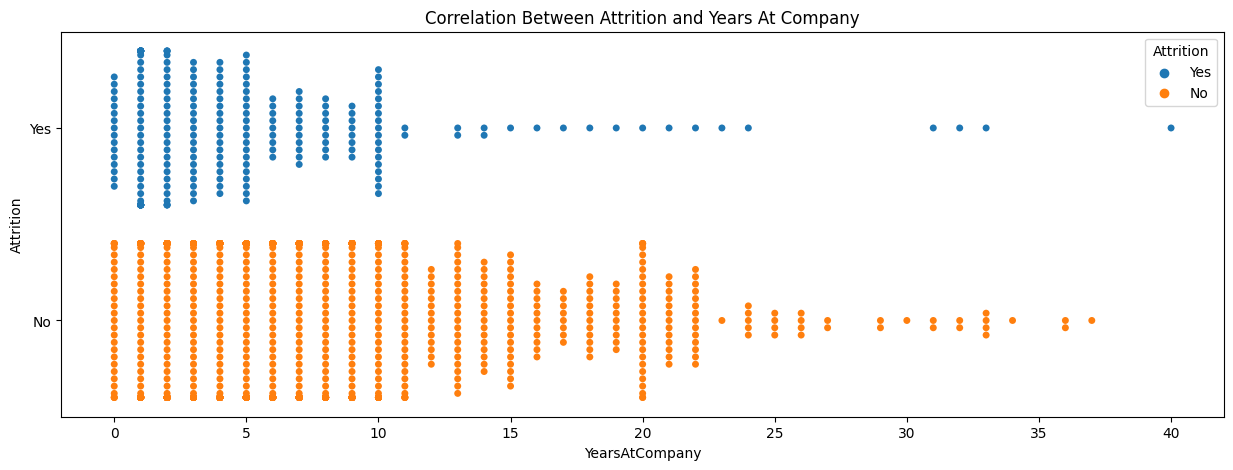

In [52]:
# 4.DESCRIPTIVE ANALYSIS

# 4.15. ATTRITION AND YEARS AT COMPANY

fig, axes = plt.subplots(figsize=(15,5))

ax=sns.swarmplot(axes, x=df["YearsAtCompany"], y=df["Attrition"], hue=df["Attrition"])
axes.set_title("Correlation Between Attrition and Years At Company")

<AxesSubplot: title={'center': 'StockOptionLevel'}, xlabel='Attrition'>

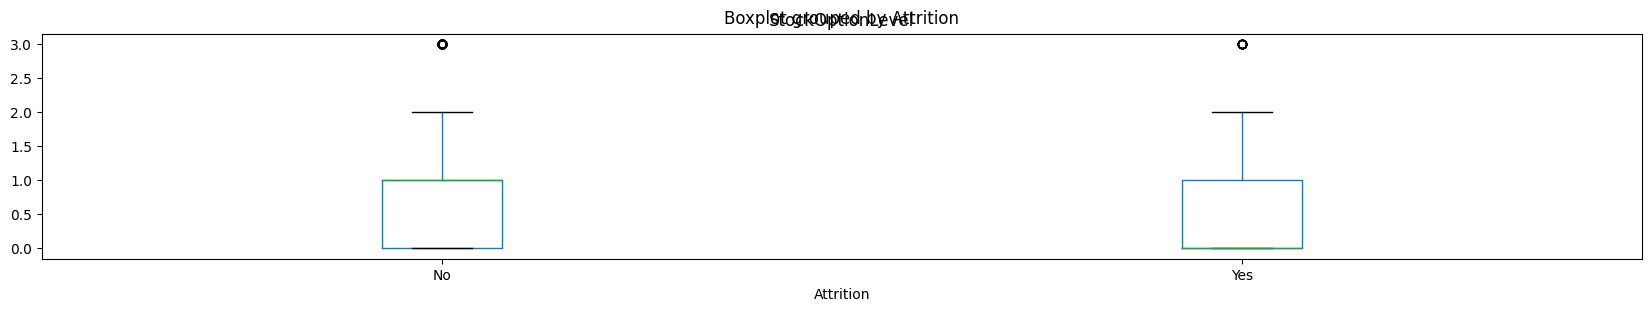

In [50]:
# 4.DESCRIPTIVE ANALYSIS

# 4.16. ATTRITION AND STOCK OPTION LEVEL

df.boxplot(by ='Attrition', column =['StockOptionLevel'], grid = False, figsize = (20,3))

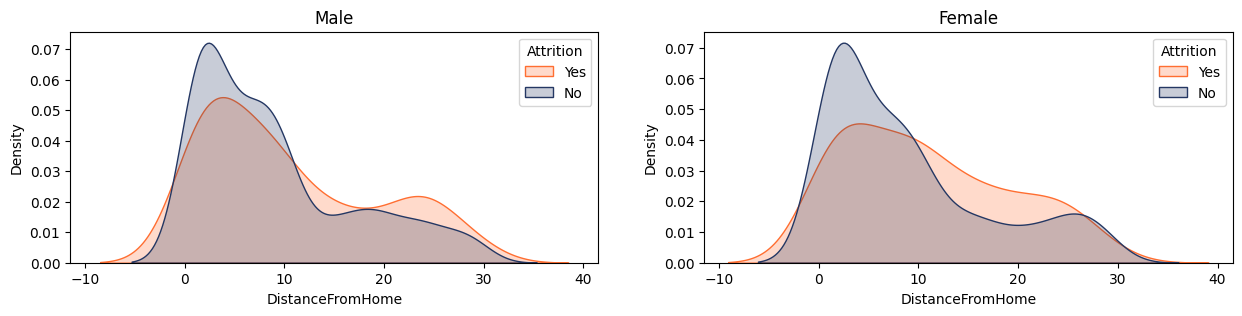

In [56]:
# 4.DESCRIPTIVE ANALYSIS

# 4.17. ATTRITION AND DISTANCE FROM HOME 

fig, axes=plt.subplots(1, 2, sharex=True, figsize=(15,3))

sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['DistanceFromHome'], color='#FF6E31', fill = True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['DistanceFromHome'], color='#243763', fill = True,label='No')

axes[0].set_title('Male')
axes[0].legend(title='Attrition')

sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['DistanceFromHome'], color='#FF6E31', fill = True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['DistanceFromHome'], color='#243763', fill = True,label='No')

axes[1].set_title('Female')
axes[1].legend(title='Attrition')

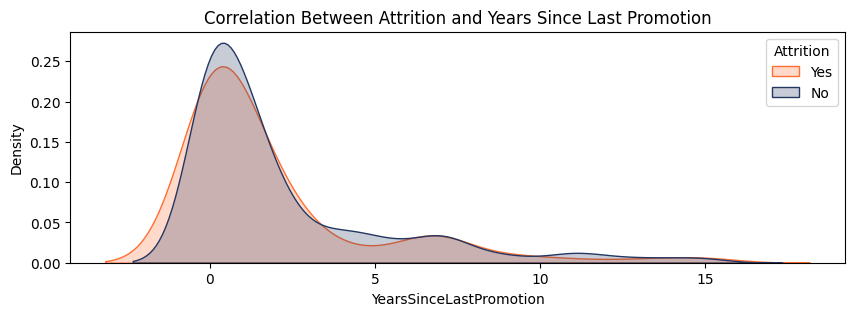

In [57]:
# 4.DESCRIPTIVE ANALYSIS

# 4.18. ATTRITION AND YEARS SINCE LAST PROMOTION 

fig, axes = plt.subplots(figsize=(10,3))

sns.kdeplot(axes,x=df[(df['Attrition']=='Yes')]['YearsSinceLastPromotion'], color='#FF6E31', fill = True, label='Yes')
sns.kdeplot(axes,x=df[(df['Attrition']=='No')]['YearsSinceLastPromotion'], color='#243763', fill = True,label='No')

axes.set_title('Correlation Between Attrition and Years Since Last Promotion')
axes.legend(title='Attrition')


C:\Users\QuanHo\AppData\Local\Temp\ipykernel_2276\2971448270.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coefficient = correlation_data.corr()


<AxesSubplot: >

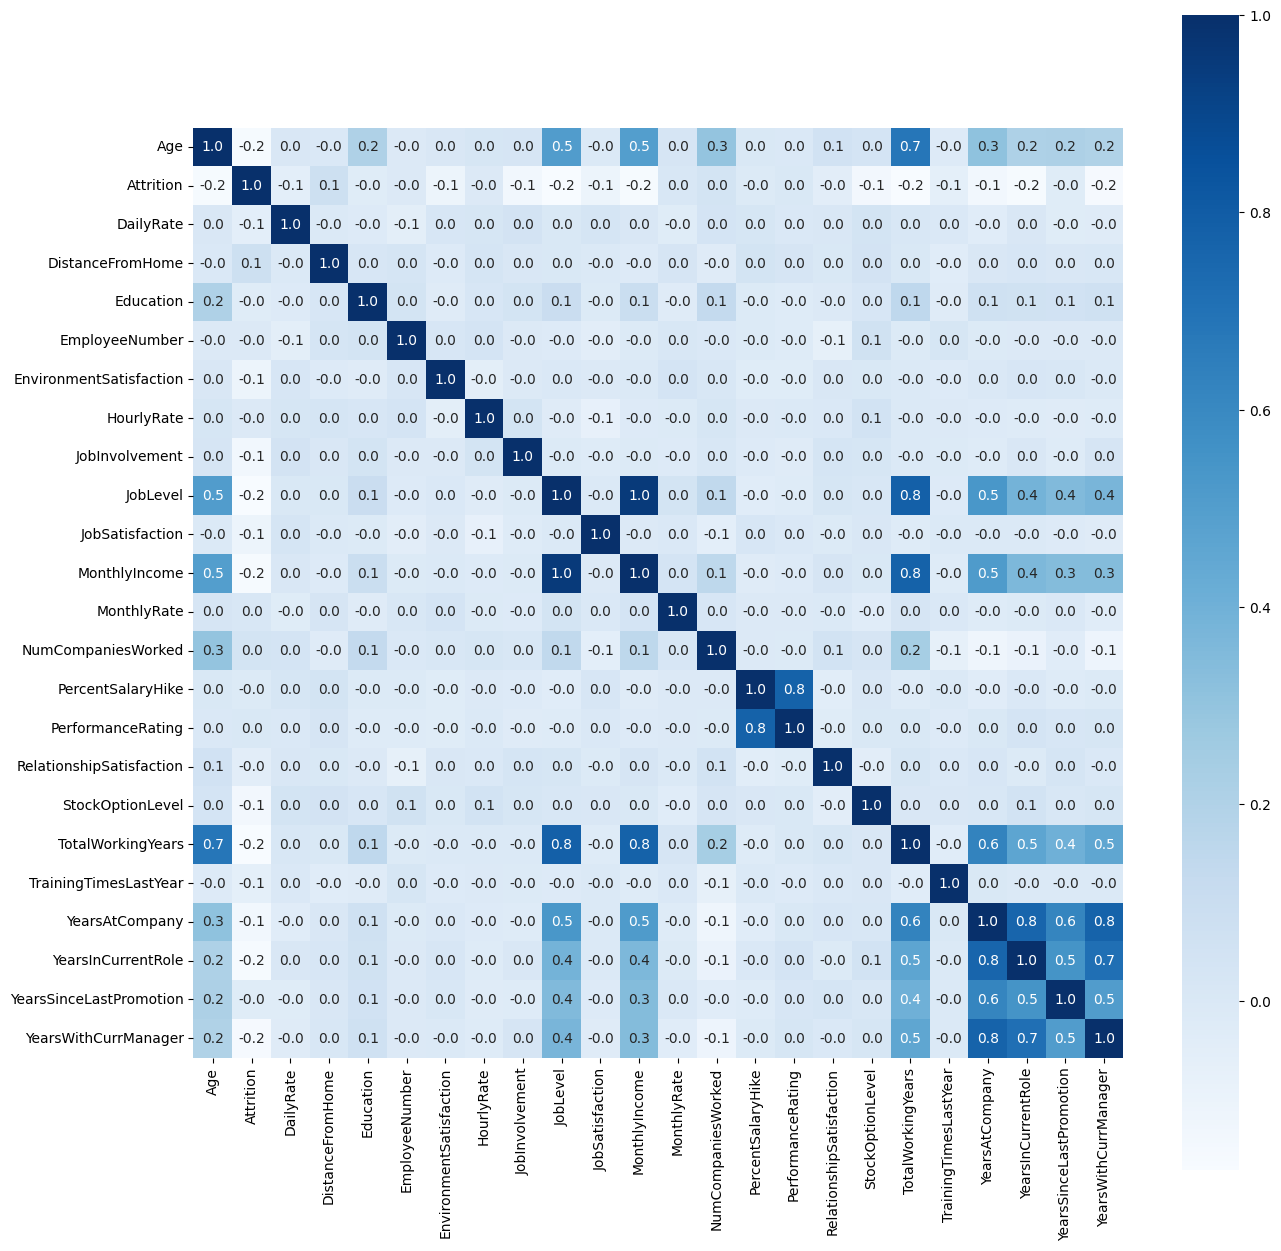

In [76]:
# 5.ADVANCED ANALYSIS

# 5.1. OVERVIEW OF CORRELATION BETWEN FACTORS 

df['Attrition']=df['Attrition'].replace('Yes',1)
df['Attrition']=df['Attrition'].replace('No',0)

correlation_data = df.drop(['EmployeeCount','StandardHours'], axis=1) # dropping these two columns because they only have one value
correlation_coefficient = correlation_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_coefficient,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')